In [77]:
myfred_api='82d9884c5a1d1e4a13053f180e201290'
from fredeco.fredData import fred_series, fred_multi_series, explore
from fredeco.fredSearch import fred_list_series, fred_info_series, fred_search, fred_vintagedates

In [17]:
import pandas
import numpy
import matplotlib
import pandas as pd
import numpy as np
import seaborn as sns
import json
import matplotlib.pyplot as plt
from PIL import Image
import matplotlib.dates as mdates
from datetime import datetime

In [74]:
data

{'Error Message': 'Invalid API call. Please retry or visit the documentation (https://www.alphavantage.co/documentation/) for TIME_SERIES_MONTHLY.'}

In [76]:
import requests
import json
import pandas 
my_api='CJA0RCBPJIL23J4D'
symbol='IBM'
url = 'https://www.alphavantage.co/query?function=TIME_SERIES_MONTHLY&symbol='+symbol+'M&apikey='+my_api
r = requests.get(url)
data = r.json()
dat=[i for i in data.items()]
   
df=pandas.DataFrame([j for i,j in [i for i in dat[1][1].items()]])
df['Dates']=sdates=[d for (d,v) in [i for i in dat[1][1].items()]]
df=df.set_index('Dates');df.columns=['Open','High','Low','Close','Volume']

In [72]:
my_api='CJA0RCBPJIL23J4D'
url2='https://www.alphavantage.co/query?function=LISTING_STATUS&apikey='+my_api
# df_symbol=pd.read_csv(url2)
# df_symbol.to_csv('symbols.csv')

In [78]:
fred_search(fred_api=myfred_api,text='Price')

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,group_popularity,notes
0,CPIAUCSL,2023-09-17,2023-09-17,Consumer Price Index for All Urban Consumers: ...,1947-01-01,2023-08-01,Monthly,M,Index 1982-1984=100,Index 1982-1984=100,Seasonally Adjusted,SA,2023-09-13 07:42:02-05,96,96,The Consumer Price Index for All Urban Consume...
1,CPIAUCNS,2023-09-17,2023-09-17,Consumer Price Index for All Urban Consumers: ...,1913-01-01,2023-08-01,Monthly,M,Index 1982-1984=100,Index 1982-1984=100,Not Seasonally Adjusted,NSA,2023-09-13 07:42:02-05,73,96,Handbook of Methods (https://www.bls.gov/opub/...
2,CUUS0000SA0,2023-09-17,2023-09-17,Consumer Price Index for All Urban Consumers: ...,1984-01-01,2023-01-01,Semiannual,SA,Index 1982-1984=100,Index 1982-1984=100,Not Seasonally Adjusted,NSA,2023-07-12 09:01:02-05,44,96,NaN
3,CSUSHPINSA,2023-09-17,2023-09-17,S&P/Case-Shiller U.S. National Home Price Index,1987-01-01,2023-06-01,Monthly,M,Index Jan 2000=100,Index Jan 2000=100,Not Seasonally Adjusted,NSA,2023-08-29 08:11:02-05,90,92,"For more information regarding the index, plea..."
4,CSUSHPISA,2023-09-17,2023-09-17,S&P/Case-Shiller U.S. National Home Price Index,1987-01-01,2023-06-01,Monthly,M,Index Jan 2000=100,Index Jan 2000=100,Seasonally Adjusted,SA,2023-08-29 08:11:04-05,80,92,"For more information regarding the index, plea..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,CUSR0000SEEE,2023-09-17,2023-09-17,Consumer Price Index for All Urban Consumers: ...,2006-01-01,2023-08-01,Monthly,M,Index Dec 1988=100,Index Dec 1988=100,Seasonally Adjusted,SA,2023-09-13 07:41:22-05,31,31,NaN
996,PCU721110721110,2023-09-17,2023-09-17,Producer Price Index by Industry: Hotels and M...,2003-12-01,2023-08-01,Monthly,M,Index Dec 2003=100,Index Dec 2003=100,Not Seasonally Adjusted,NSA,2023-09-14 07:53:06-05,31,31,NaN
997,WPU02930102,2023-09-17,2023-09-17,Producer Price Index by Commodity: Processed F...,1986-12-01,2023-08-01,Monthly,M,Index Dec 1986=100,Index Dec 1986=100,Not Seasonally Adjusted,NSA,2023-09-14 07:52:10-05,31,31,NaN
998,PMETAINDEXQ,2023-09-17,2023-09-17,Global price of Metal index,1992-01-01,2023-04-01,Quarterly,Q,Index 2016 = 100,Index 2016 = 100,Not Seasonally Adjusted,NSA,2023-08-29 13:17:15-05,6,42,Value represents the benchmark prices which ar...


In [108]:
df_price=fred_multi_series(fred_api=myfred_api,series=['CPIAUCNS', # seasonaly adjusted
                                              'MICH'],frequency='m')

In [109]:
df_price.index=pd.to_datetime(df_price.index.tolist(),format='%Y-%m-%d')
df_price.tail(5)

,CPIAUCNS,MICH
2023-04-01,303.363,4.6
2023-05-01,304.127,4.2
2023-06-01,305.109,3.3
2023-07-01,305.691,3.4
2023-08-01,307.026,NaN


In [136]:
df_price['CPI_rol3']=(df_price.CPIAUCNS.pct_change()*100).rolling(12).mean()
df_price['MICH_rol3']=df_price.MICH.rolling(12).mean()
df_price.tail(4)

,CPIAUCNS,MICH,CPI_rol3,MICH_rol3
2023-05-01,304.127,4.2,0.332137,4.558333
2023-06-01,305.109,3.3,0.244577,4.391667
2023-07-01,305.691,3.4,0.261457,4.241667
2023-08-01,307.026,NaN,0.300804,NaN


<Axes: ylabel='MICH'>

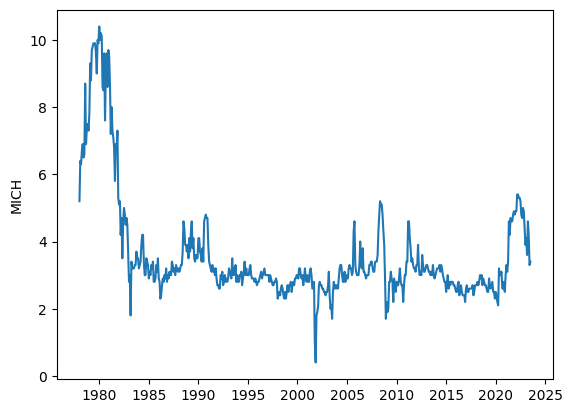

In [137]:
sns.lineplot(y='MICH',x=df_price.index, data=df_price)

In [120]:
12*5

60

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


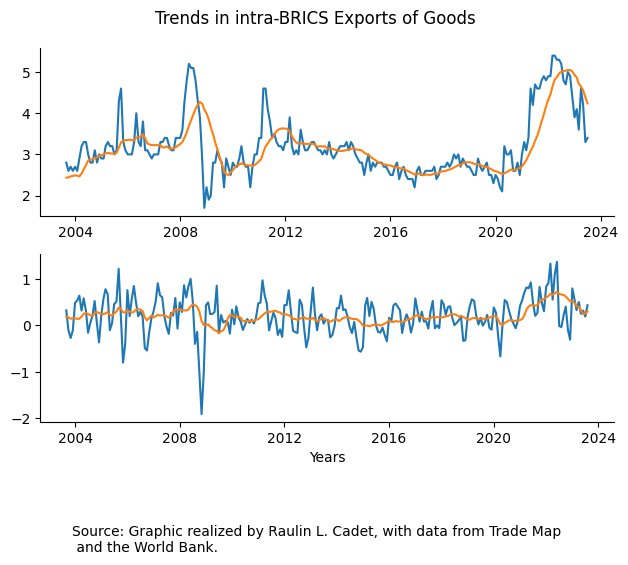

In [141]:
fig,ax=plt.subplots(2,1)
ax[0].plot(df_price['MICH'].tail(240))
ax[0].plot(df_price['MICH_rol3'].tail(240))
ax[1].plot((df_price['CPIAUCNS'].pct_change()*100).tail(240))
ax[1].plot(df_price['CPI_rol3'].tail(240))
ax[1].set_xlabel('Years')
fig.legend(ncol=3,loc='lower left',frameon=False,bbox_to_anchor=(0.12,-0.1))  # to add legend, without frame
fig.text(0.12, -0.15, 'Source: Graphic realized by Raulin L. Cadet, with data from Trade Map\n and the World Bank.',  
 ha='left')
ax[0].spines[['right', 'top']].set_visible(False)              # to remove top and right spines
ax[1].spines[['right', 'top']].set_visible(False)              # to remove top and right spines
plt.subplots_adjust(wspace=0.5)  # Increase the horizontal space between subplots
fig.suptitle('Trends in intra-BRICS Exports of Goods')
plt.tight_layout()

In [130]:
df_price.pct_change().rolling(3).mean()

,CPIAUCNS,MICH
1913-01-01,NaN,NaN
1913-02-01,NaN,NaN
1913-03-01,NaN,NaN
1913-04-01,0.000000,NaN
1913-05-01,-0.003401,NaN
...,...,...
2023-04-01,0.004651,0.069036
2023-05-01,0.003629,0.022957
2023-06-01,0.003602,-0.007821
2023-07-01,0.002552,-0.090313


In [89]:
fred_info_series(fred_api=myfred_api,series='CPIAUCNS'),fred_info_series(fred_api=myfred_api,series='MICH')

({'realtime_start': '2023-09-17',
  'realtime_end': '2023-09-17',
  'seriess': [{'id': 'CPIAUCNS',
    'realtime_start': '2023-09-17',
    'realtime_end': '2023-09-17',
    'title': 'Consumer Price Index for All Urban Consumers: All Items in U.S. City Average',
    'observation_start': '1913-01-01',
    'observation_end': '2023-08-01',
    'frequency': 'Monthly',
    'frequency_short': 'M',
    'units': 'Index 1982-1984=100',
    'units_short': 'Index 1982-1984=100',
    'seasonal_adjustment': 'Not Seasonally Adjusted',
    'seasonal_adjustment_short': 'NSA',
    'last_updated': '2023-09-13 07:42:02-05',
    'popularity': 73,
    'notes': 'Handbook of Methods (https://www.bls.gov/opub/hom/pdf/cpihom.pdf)\nUnderstanding the CPI: Frequently Asked Questions (https://www.bls.gov/cpi/questions-and-answers.htm)'}]},
 {'realtime_start': '2023-09-17',
  'realtime_end': '2023-09-17',
  'seriess': [{'id': 'MICH',
    'realtime_start': '2023-09-17',
    'realtime_end': '2023-09-17',
    'title': 

In [125]:
df_price.tail(5),df_price.tail(5).pct_change()*100

(            CPIAUCNS  MICH
 2023-04-01   303.363   4.6
 2023-05-01   304.127   4.2
 2023-06-01   305.109   3.3
 2023-07-01   305.691   3.4
 2023-08-01   307.026   NaN,
             CPIAUCNS       MICH
 2023-04-01       NaN        NaN
 2023-05-01  0.251844  -8.695652
 2023-06-01  0.322891 -21.428571
 2023-07-01  0.190752   3.030303
 2023-08-01  0.436716   0.000000)

In [126]:
(304.127-303.363)/303.363*100


0.2518435010202332